# LOAD DATASET

In [8]:
import scipy.io as scio
base = scio.loadmat('ndata.mat')
x,y=base['orgin'].transpose(),base['result'][:,1]

In [9]:
xmin,xmax,ymin,ymax = x.min(),x.max(),y.min(),y.max()
x,y = (x-xmin)/(xmax-xmin),(y-ymin)/(ymax-ymin)

In [10]:
x = x.reshape((40,-1,1))

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
print(x_train.shape,x_test.shape)

(30, 1867, 1) (10, 1867, 1)


# BUILD CONVOLUTION1D MODEL

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [57]:
model = Sequential()
model.add(Conv1D(64, 3, activation='tanh', padding='valid',input_shape=(1867, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='tanh',padding='valid'))
#model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(1024,activation='tanh'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 1865, 64)          256       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 932, 64)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 930, 32)           6176      
_________________________________________________________________
flatten_3 (Flatten)          (None, 29760)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              30475264  
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1025      
Total params: 30,482,721
Trainable params: 30,482,721
Non-trainable params: 0
________________________________________________________________

In [58]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
model_history = model.fit(x_train, y_train,batch_size=10, epochs=1000,shuffle=True,validation_split=0.2,verbose=1)

C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 24 samples, validate on 6 samples
Epoch 1/1000
24/24 [==============================] - 0s - loss: 3.1021 - val_loss: 0.1708
Epoch 2/1000
24/24 [==============================] - 0s - loss: 1.0389 - val_loss: 0.5770
Epoch 3/1000
24/24 [==============================] - 0s - loss: 1.7580 - val_loss: 0.2621
Epoch 4/1000
24/24 [==============================] - 0s - loss: 0.8343 - val_loss: 0.0765
Epoch 5/1000
24/24 [==============================] - 0s - loss: 0.7767 - val_loss: 0.0992
Epoch 6/1000
24/24 [==============================] - 0s - loss: 0.4323 - val_loss: 0.0244
Epoch 7/1000
24/24 [==============================] - 0s - loss: 0.2967 - val_loss: 0.0233
Epoch 8/1000
24/24 [==============================] - 0s - loss: 0.1946 - val_loss: 0.1625
Epoch 9/1000
24/24 [==============================] - 0s - loss: 0.1114 - val_loss: 0.2152
Epoch 10/1000
24/24 [==============================] - 0s - loss: 0.1434 - val_loss: 0.1903
Epoch 11/1000
24/24 [=========================

SHOW THE LOSS

In [87]:
import matplotlib.pyplot as plt
import numpy as np

In [89]:
np.save('loss_conv.npy',model_history.history['loss'])

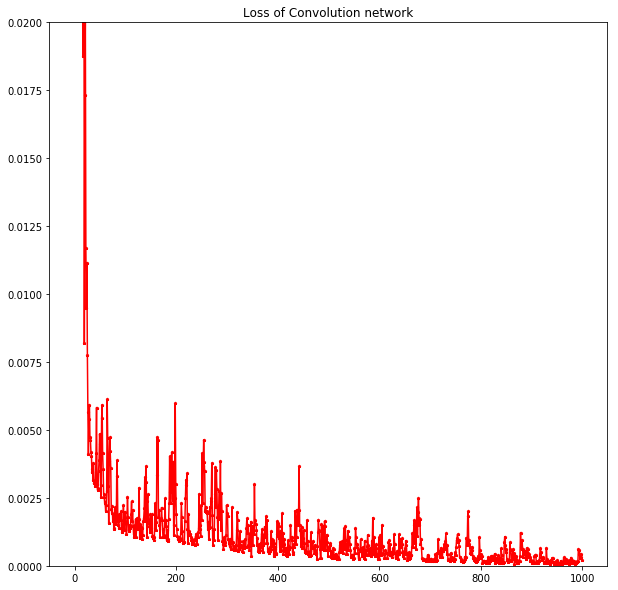

In [85]:
plt.figure(figsize=(10,10))
plt.plot(model_history.history['loss'],'r-*',ms=3)
plt.ylim([0,0.02])
plt.title('Loss of Convolution network')
plt.savefig('Convolution1D')
plt.show()

In [62]:
from sklearn.metrics import r2_score
y_train_true,y_train_pred = y_train,model.predict(x_train)
y_test_true, y_test_pred  = y_test, model.predict(x_test)
print( r2_score(y_test_true, y_test_pred),
      r2_score(y_train_true,y_train_pred))

0.993777122927 0.995186672427


C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


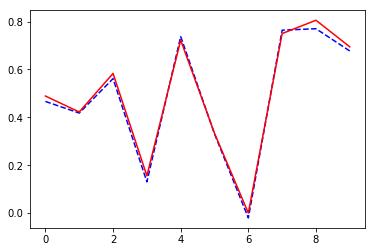

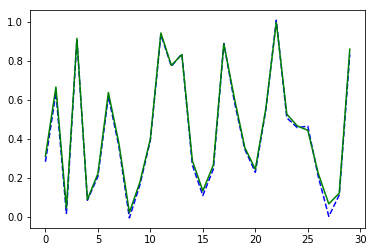

In [63]:
test_pre = model.predict(x_test)
train_pre = model.predict(x_train)

import numpy as np
sample_train,sample_test = len(train_pre),len(test_pre)
plt.plot(np.arange(sample_test),test_pre,'b--',np.arange(sample_test),y_test,'-r')
plt.show()
plt.plot(np.arange(sample_train),train_pre,'b--',np.arange(sample_train),y_train,'-g')
plt.show()